<a href="https://colab.research.google.com/github/Sasidhar152/SRS/blob/main/CREDIT_CARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

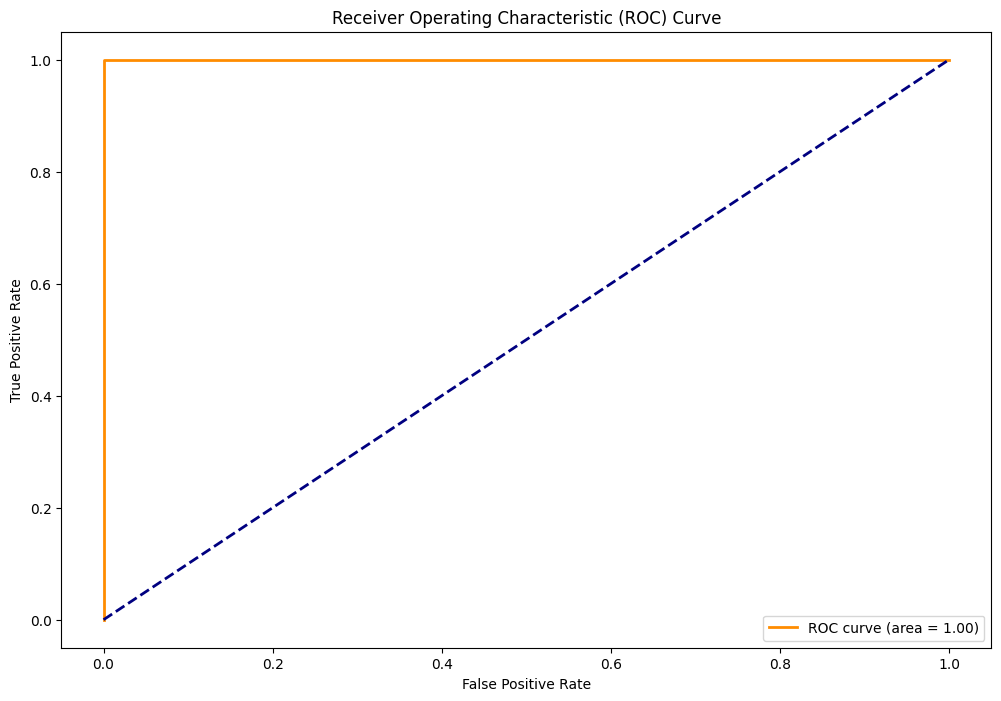

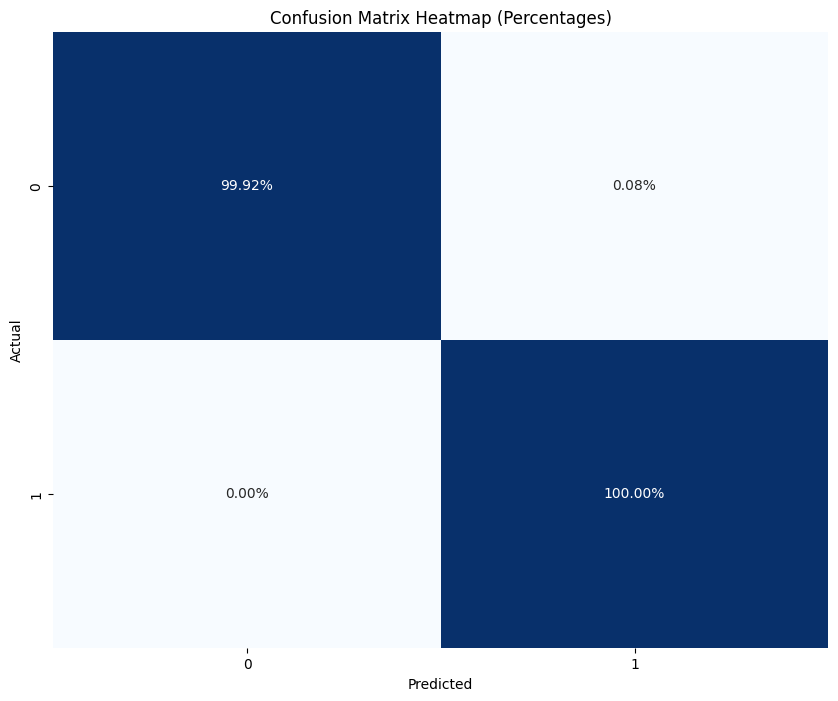

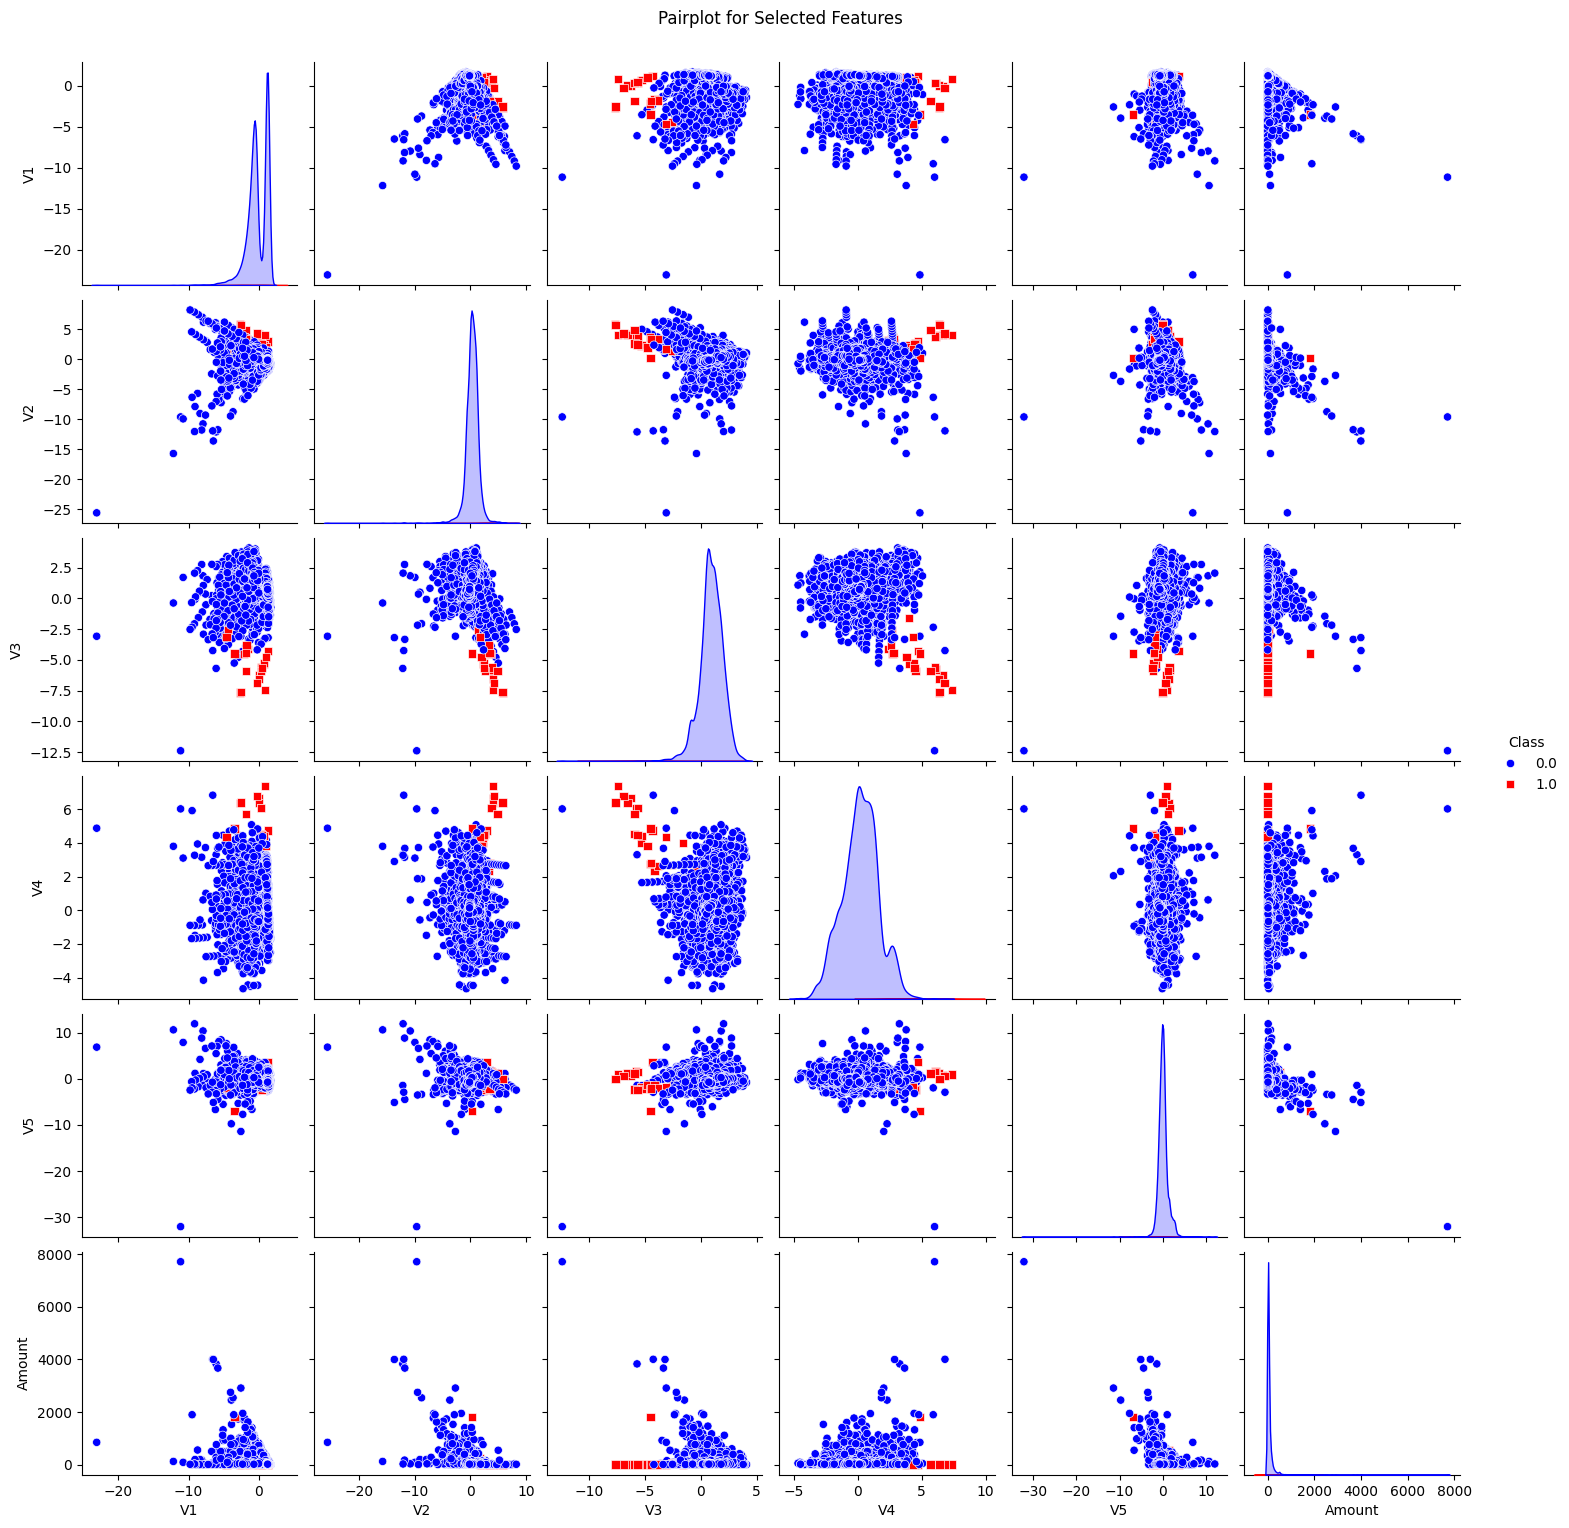

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

url = '/content/creditcard.csv'
credit_card_data = pd.read_csv(url)

print(credit_card_data.head())

X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

X_imputer = SimpleImputer(strategy='mean')
X = X_imputer.fit_transform(X)

y_imputer = SimpleImputer(strategy='most_frequent')
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Adjust test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # You can try different values

# Modify SMOTE parameters
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # You can try different values for sampling_strategy
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Use a different classifier (e.g., Logistic Regression)
model = LogisticRegression(random_state=42, C=0.1)  # You can experiment with different values for C
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']
sns.pairplot(credit_card_data[selected_features], hue='Class', markers=['o', 's'], palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot for Selected Features', y=1.02)

plt.show()
